In [6]:
from sklearn.datasets import load_wine
wine = load_wine()
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [14]:
import pandas as pd
df = pd.DataFrame(wine.data, columns=wine.feature_names)
sy = pd.Series(wine.target, dtype="category")
sy = sy.cat.rename_categories(wine.target_names)
df['class'] = sy
df.tail()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740.0,class_2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750.0,class_2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835.0,class_2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840.0,class_2
177,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560.0,class_2


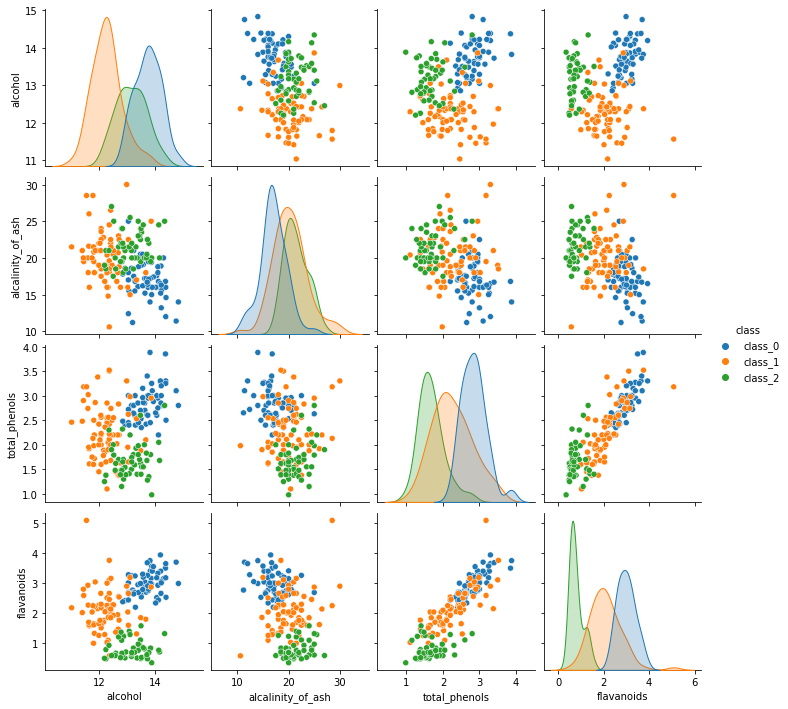

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(vars=["alcohol", "alcalinity_of_ash", "total_phenols", "flavanoids"], 
             hue="class", data=df)
plt.show()

In [40]:
X = wine.data
y = wine.target

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state =1, stratify = y)

In [42]:
import numpy as np
print(np.bincount(y))
print(np.bincount(y_train))
print(np.bincount(y_test))

[59 71 48]
[41 50 33]
[18 21 15]


In [43]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

### 퍼셉트론 사용하기

In [49]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

In [45]:
y_pred = ppn.predict(X_test_std)
print('잘못 분류된 샘플 개수: %d' % (y_test != y_pred).sum())

잘못 분류된 샘플 개수: 2


In [46]:
from sklearn.metrics import accuracy_score

print('정확도: %.3f' % accuracy_score(y_test, y_pred))

정확도: 0.963


### 로지스틱 회귀분석 사용하기

In [50]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100.0, random_state = 1)
lr.fit(X_train_std, y_train)

LogisticRegression(C=100.0, random_state=1)

In [53]:
from sklearn.metrics import accuracy_score
y_pred = lr.predict(X_test_std)
print('잘못 분류된 샘플 개수: %d' % (y_test != y_pred).sum())
print('정확도: %.3f' % accuracy_score(y_test, y_pred))

잘못 분류된 샘플 개수: 1
정확도: 0.981


### 결정 트리 사용하기

In [62]:
x_data = wine.data
y_data = wine.target
print(x_data.shape)
print(y_data.shape)

(178, 13)
(178,)


In [64]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.33)

In [69]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion='gini', max_depth=None, max_leaf_nodes=None, min_samples_split=2, min_samples_leaf=1, max_features=None)
tree_model.fit(x_train, y_train)


y_predict = tree_model.predict(x_train) 
score = accuracy_score(y_train, y_predict)
print(score) #1.0

y_predict = tree_model.predict(x_test) 
score = accuracy_score(y_test, y_predict)
print(score) #1.0

1.0
0.9322033898305084


### K-최근접 이웃 사용하기

In [74]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_data)
x_data = scaler.transform(x_data)

In [75]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5,
                          p=2,
                          metric = 'minkowski')
knn.fit(x_train, y_train)


KNeighborsClassifier()

In [76]:
y_predict = knn.predict(x_train) 
score = accuracy_score(y_train, y_predict)
print(score) #1.0

y_predict = knn.predict(x_test) 
score = accuracy_score(y_test, y_predict)
print(score) #1.0

0.8403361344537815
0.6949152542372882
